In [3]:
import pandas as pd
import numpy as np
from math import sin, cos, pi, atan2, asin, sqrt
import matplotlib.pyplot as plt
from scipy import integrate
import Helper_Functions as hf

In [5]:
################## CONSTANTS ##################
# gravity
g = 9.81  # m/s^2
# m to ft
ft = 3.2884  # ft/m

################## DATA FRAME ##################
datafile = '../../Data/Trunc_Fullscale1.csv'
fields = ['Timestamp', 'Pres',
  'dTheta X', 'dTheta Y', 'dTheta Z',
  'Roll', 'Pitch', 'Yaw',
  'dVel X', 'dVel Y', 'dVel Z',
  'Qtn[0]', 'Qtn[1]', 'Qtn[2]', 'Qtn[3]',
  'LinearAccelNed X', 'LinearAccelNed Y', 'LinearAccelNed Z',
  'Accel X', 'Accel Y', 'Accel Z'
  ]

df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
all_time = df['Timestamp'].values

tdata = all_time
tdata = tdata - all_time[0]
L = tdata.shape[0]

In [6]:
ax_vn = df['LinearAccelNed X']* ft
ay_vn = df['LinearAccelNed Y']* ft
az_vn = df['LinearAccelNed Z']* -ft

ax_g = df['LinearAccelNed X']/9.8 #* ft
ay_g = df['LinearAccelNed Y']/9.8 #* ft
az_g = df['LinearAccelNed Z']/-9.8 #* -ft

accel_xyz = [ax_vn, ay_vn, az_vn]
v_vec, x_vec = hf.numerical_int(accel_xyz, tdata)

vx_vn, vy_vn, vz_vn = v_vec[0], v_vec[1], v_vec[2]
x_vn, y_vn, z_vn = x_vec[0], x_vec[1], x_vec[2]

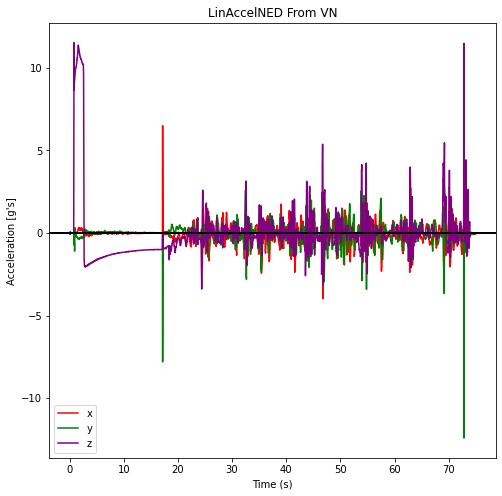

In [7]:
fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata, ax_g, color='red', label='x')
l3 = ax.plot(tdata, ay_g, color='green', label='y')
l4 = ax.plot(tdata, az_g, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
ax.legend()
plt.show()

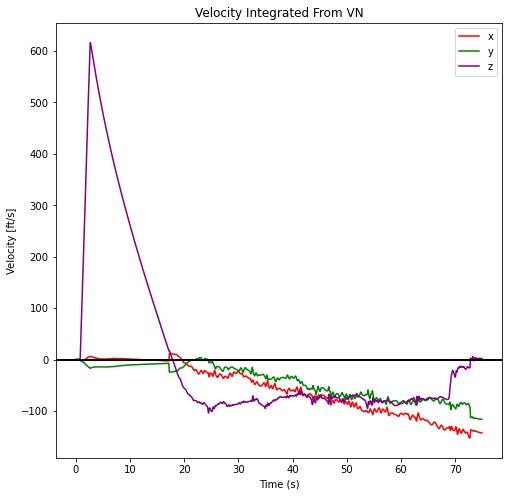

In [8]:
fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata, vx_vn, color='red', label='x')
l3 = ax.plot(tdata, vy_vn, color='green', label='y')
l4 = ax.plot(tdata, vz_vn, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Velocity Integrated From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Velocity [ft/s]")
ax.legend()
plt.show()

In [9]:
P = df['Pres']
v_NASA_pres = np.vectorize(hf.nasa_pres)
altitude_NASA_pres = v_NASA_pres(P, P0=99.035, T0=288.1)*ft + 600
#T0 really was 303.3966... this would've been biased by the RPi tho

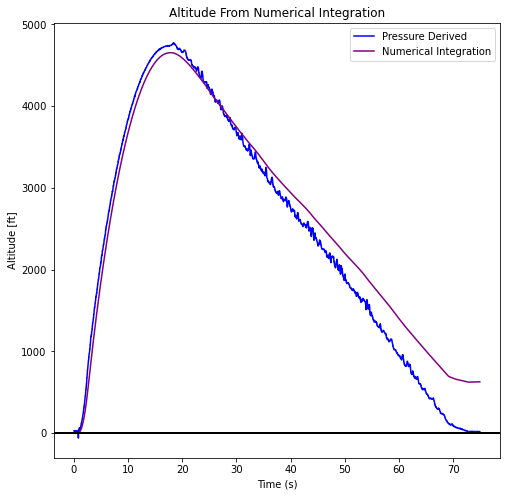

In [10]:
fig1 = plt.figure(1, figsize=(8,8))
# Just the Displacement:
ax = plt.subplot(111)
l1 = ax.plot(tdata, altitude_NASA_pres, color='blue', label='Pressure Derived')
l4 = ax.plot(tdata, z_vn, color='purple', label='Numerical Integration')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Altitude From Numerical Integration")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Altitude [ft]")
ax.legend()
plt.show()

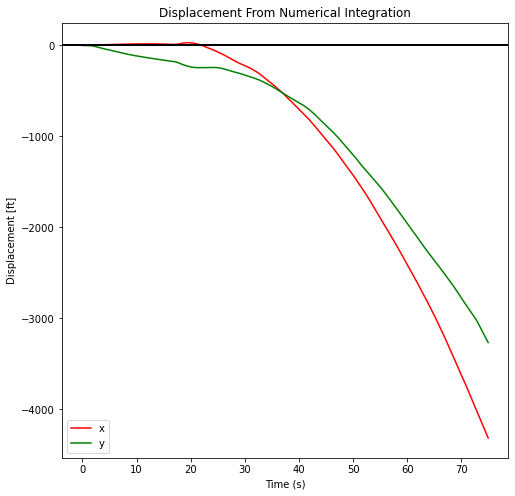

In [11]:
fig1 = plt.figure(1, figsize=(8,8))
# Just the Displacement:
ax = plt.subplot(111)
l2 = ax.plot(tdata, x_vn, color='red', label='x')
l3 = ax.plot(tdata, y_vn, color='green', label='y')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Displacement From Numerical Integration")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Displacement [ft]")
ax.legend()
plt.show()

## Filtered XY to show "bending into the wind"

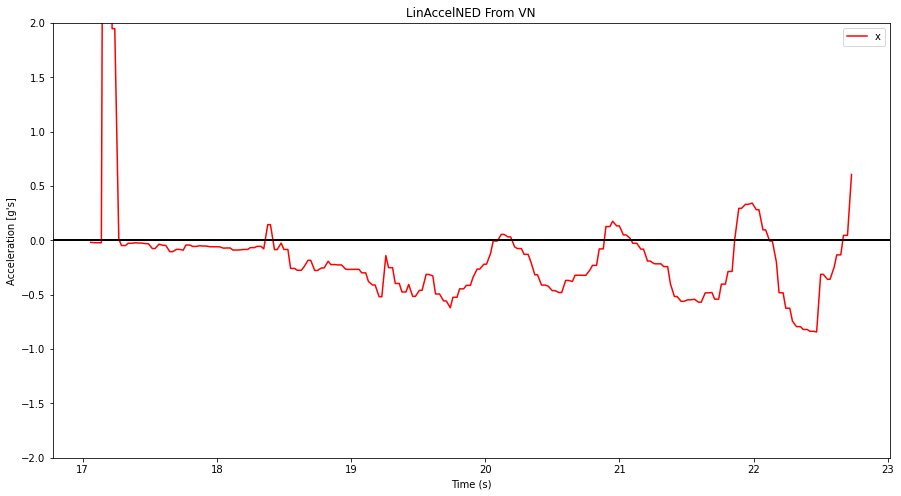

In [20]:
start = 675
end = 900

fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata[start:end], ax_g[start:end], color='red', label='x')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
plt.ylim((-2, 2))

ax.legend()
plt.show()

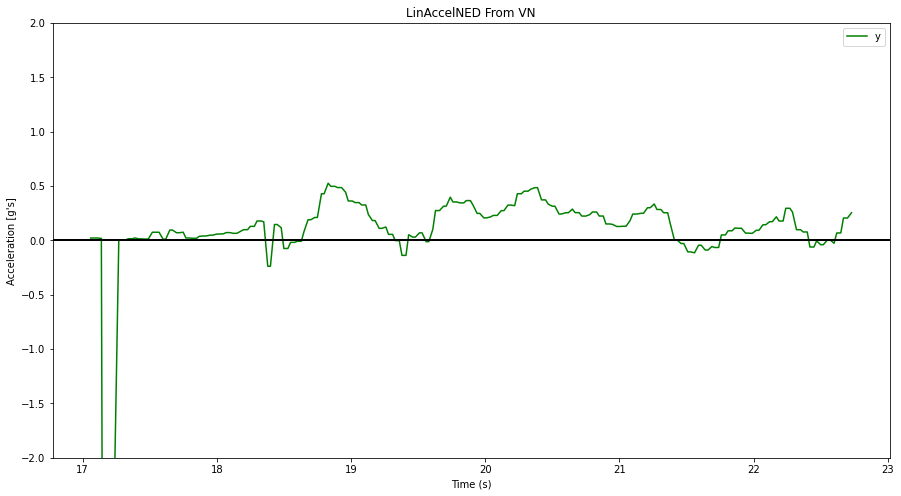

In [21]:
fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata[start:end], ay_g[start:end], color='green', label='y')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
plt.ylim((-2, 2))

ax.legend()
plt.show()

## YPR Analysis

In [32]:
# Just using the raw values directly from the VN
byaw = df['Yaw'].values
bpitch = df['Pitch'].values
broll = df['Roll'].values

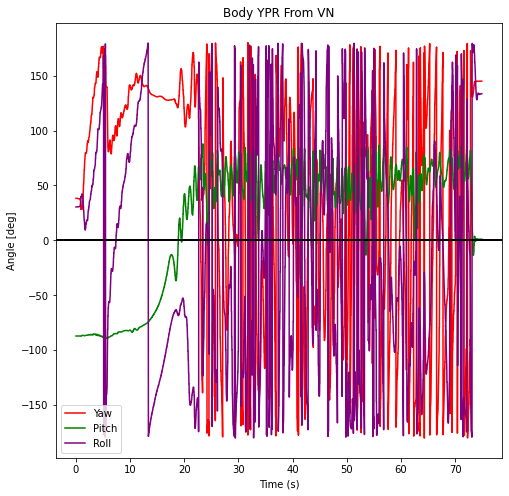

In [33]:
fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata, byaw, color='red', label='Yaw')
l3 = ax.plot(tdata, bpitch, color='green', label='Pitch')
l4 = ax.plot(tdata, broll, color='purple', label='Roll')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Body YPR From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Angle [deg]")
ax.legend()
plt.show()

In [34]:
def make_rot_matrix(yaw, pitch, roll):
    Ry = np.array([[cos(pi/180*yaw), -sin(pi/180*yaw), 0],
                   [sin(pi/180*yaw), cos(pi/180*yaw), 0],
                   [0, 0, 1]])
    Rp = np.array([[cos(pi/180*pitch), 0, sin(pi/180*pitch)],
                   [0, 1, 0],
                   [-sin(pi/180*pitch), 0, cos(pi/180*pitch)]])
    Rr = np.array([[1, 0, 0],
                   [0, cos(pi/180*roll), -sin(pi/180*roll)],
                   [0, sin(pi/180*roll), cos(pi/180*roll)]]) 
    return np.matmul( np.matmul(Ry, Rp), Rr )

In [35]:
v_len = len(byaw)

bYPR = np.zeros((3, v_len))
ffyaw = np.zeros(v_len)
ffpitch = np.zeros(v_len)
ffroll = np.zeros(v_len)

for i in range(v_len):
    bYPR[0, i], bYPR[1, i], bYPR[2, i] = byaw[i], bpitch[i], broll[i]
    
    YPR = [byaw[i], bpitch[i], broll[i]]

    # Account for IMU misalignment with launch vehicle frame
    post_YPR = hf.convert_abg(YPR)
    # Convert IMU data from body frame to fixed frame
    ff_output = hf.get_ffYPR_theta(post_YPR)
    
    ffyaw[i], ffpitch[i], ffroll[i] = ff_output[0], ff_output[1], ff_output[2]

ffYPR = np.stack((ffyaw, ffpitch, ffroll))
# ffYPR = np.reshape(ffYPR, (ffYPR.shape[2], ffYPR.shape[1]))

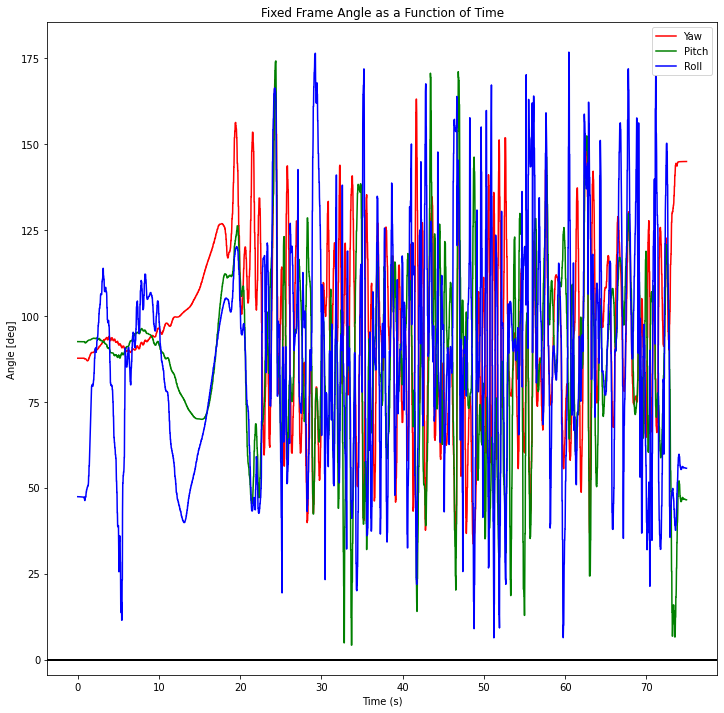

In [36]:
fig1 = plt.figure(1, figsize=(12,12))
ax = plt.subplot(111)
l2 = ax.plot(tdata, ffyaw, 'r', label='Yaw')
l3 = ax.plot(tdata, ffpitch, 'g', label='Pitch')
l4 = ax.plot(tdata, ffroll, 'b', label='Roll')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Fixed Frame Angle as a Function of Time")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Angle [deg]")
ax.legend()
plt.show()

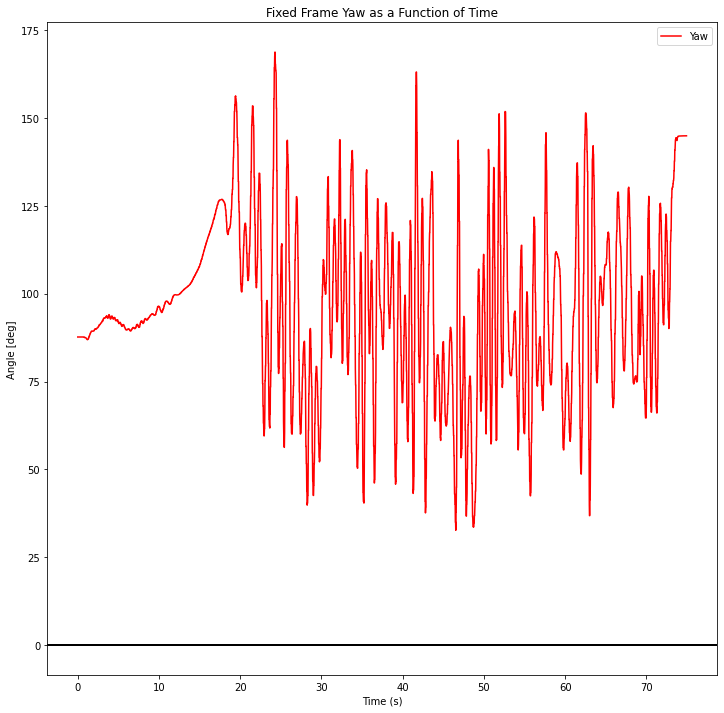

In [37]:
fig1 = plt.figure(1, figsize=(12,12))
ax = plt.subplot(111)
l2 = ax.plot(tdata, ffyaw, 'r', label='Yaw')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Fixed Frame Yaw as a Function of Time")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Angle [deg]")
ax.legend()
plt.show()

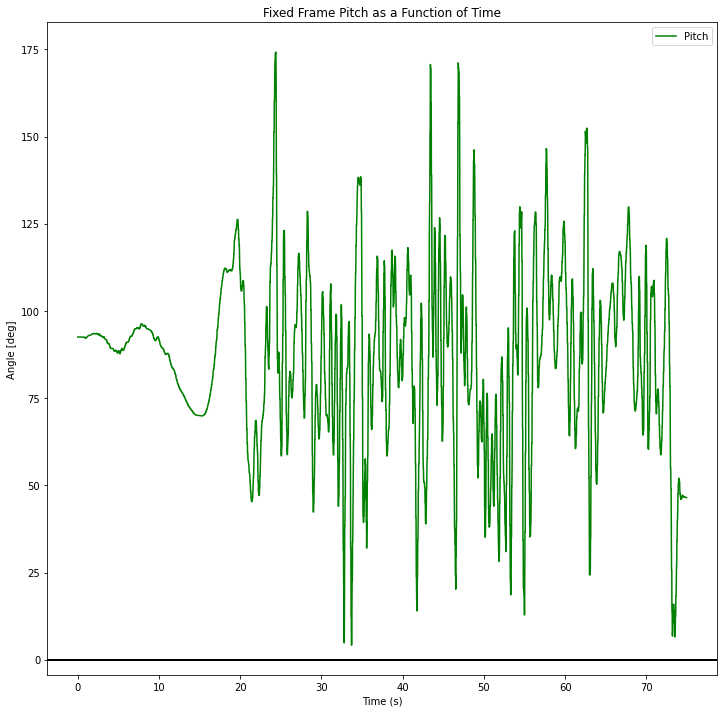

In [38]:
fig1 = plt.figure(1, figsize=(12,12))
ax = plt.subplot(111)
l3 = ax.plot(tdata, ffpitch, 'g', label='Pitch')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Fixed Frame Pitch as a Function of Time")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Angle [deg]")
ax.legend()
plt.show()

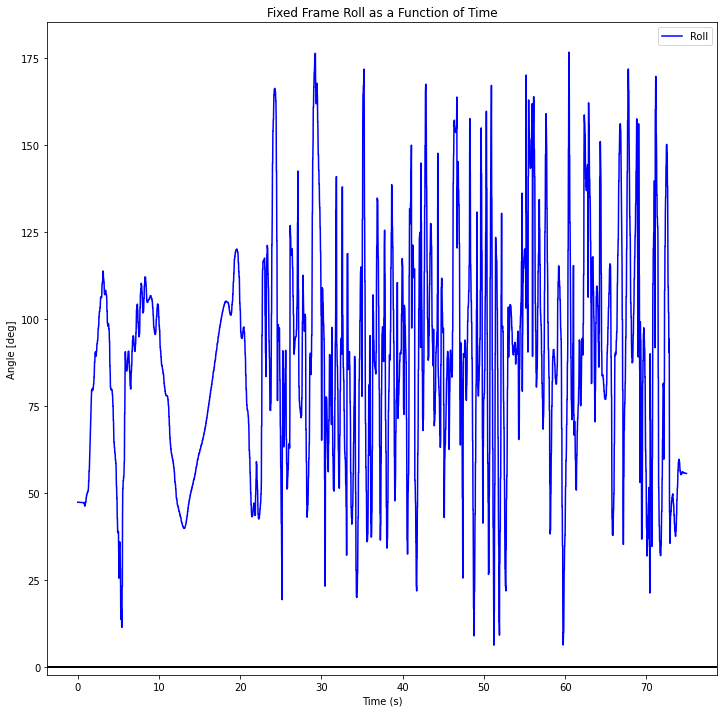

In [39]:
fig1 = plt.figure(1, figsize=(12,12))
ax = plt.subplot(111)
l4 = ax.plot(tdata, ffroll, 'b', label='Roll')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Fixed Frame Roll as a Function of Time")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Angle [deg]")
ax.legend()
plt.show()